## Preprocessing Data
The Ted Talk datasets come in two separate datasets which we'll need to combine.

In [1]:
import pandas as pd
ted_main = pd.read_csv('./data/ted_main.csv')
transcripts = pd.read_csv('./data/transcripts.csv')

print(ted_main.columns)
print('===========================================================')
print(transcripts.columns)

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views'],
      dtype='object')
Index(['transcript', 'url'], dtype='object')


"ted_main" contains the features relevant to our summarizer, "descriptions" and "main_speaker". "transcripts" contains "transcript". Both csv files contain "url" which we can join on.

In [2]:
merged = pd.merge(ted_main, transcripts, left_on="url", right_on="url")
merged = merged.iloc[:,1:] #Creates a default empty column of row numbers so we want to remove this.

In [3]:
merged.head(5)

,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


There a few columns we don't need for the purposes of our project. However, we'll keep them for now in-case we find some of the features may help the notes/summary-generator in terms of ROGUE-1/ROGUE-2 scores. For now, we'll be removing certain features specific to Ted Talk transcripts such as the use of parentheses to denote sound. e.g. "(applause)", "(Music: Song Title, Artist)", "(Laughter)". 

In [4]:
import re

"""
These "audio" parentheses are either added with a space included or not. For further cleaning, it's better to 
add an additional white-space, then collapse all whitespace that's 2 or greater in length into a single one. 
"""
def strip_parens(transcript):
    pattern = r'\((.*?)\)'
    return re.sub(pattern, ' ', transcript) 

merged['transcript'].head(5)

0    Good morning. How are you?(Laughter)It's been ...
1    Thank you so much, Chris. And it's truly a gre...
2    (Music: "The Sound of Silence," Simon & Garfun...
3    If you're here today — and I'm very happy that...
4    About 10 years ago, I took on the task to teac...
Name: transcript, dtype: object

Can see on record 0, "How are you?(Laughter)It's been..." and on record 2, "(Music: "The Sound of Silence," Simon & Garfun..."

In [5]:
merged['transcript'] = merged['transcript'].apply(strip_parens)
merged['transcript'].head(5)

0    Good morning. How are you? It's been great, ha...
1    Thank you so much, Chris. And it's truly a gre...
2     Hello voice mail, my old friend. I've called ...
3    If you're here today — and I'm very happy that...
4    About 10 years ago, I took on the task to teac...
Name: transcript, dtype: object

Some of these "audio parentheses" are often stacked next to each other which will introduce some odd spacings between tokens in the transcript so we'll fix this as well.

In [6]:
def condense_ws(transcript):
    pattern = r'\s+'
    return re.sub(pattern, ' ', transcript.strip()) #strip() to remove any spacings at the beginning or end
merged['transcript'] = merged['transcript'].apply(condense_ws)

In [7]:
merged['transcript'].head(5)

0    Good morning. How are you? It's been great, ha...
1    Thank you so much, Chris. And it's truly a gre...
2    Hello voice mail, my old friend. I've called f...
3    If you're here today — and I'm very happy that...
4    About 10 years ago, I took on the task to teac...
Name: transcript, dtype: object

Now we'll save the data as a pickle file to preserve the exact state of the dataframe.

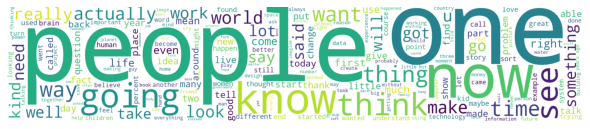

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

for transcript in merged['transcript']:
    transcript = str(transcript)
    tokens = transcript.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += ' '.join(tokens) + ' '
#     print(comment_words)
    
wordcloud = WordCloud(width = 2000, height = 400,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 5).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('foo1.png', bbox_inches='tight')
plt.show()

